# Paso 1.

In [3]:
# Importacion de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
# Cargar datos 
gym = pd.read_csv('C:/Users/chino/Downloads/csvs_sprints//gym_churn_us.csv')

## 1.1 Análisis Exploratorio de Datos (EDA).

In [5]:
# Mostrar Datos
display(gym.head())
print (gym.info())
print(gym.describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Después de cargar los datos, podemos observar que, no hay datos ausentes lo cual es buena señal.

También los promedios y desviaciones estándar varían mucho en cada una de las características lo que sugiere que al momento de llevar a cabo y entrenar los modelos, primero debemos estandarizar los datos.


In [6]:
# Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.
display(gym.groupby('Churn').mean())


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Churn
0    [[Axes(0.125,0.722857;0.158163x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.158163x0.157143), Axes...
dtype: object

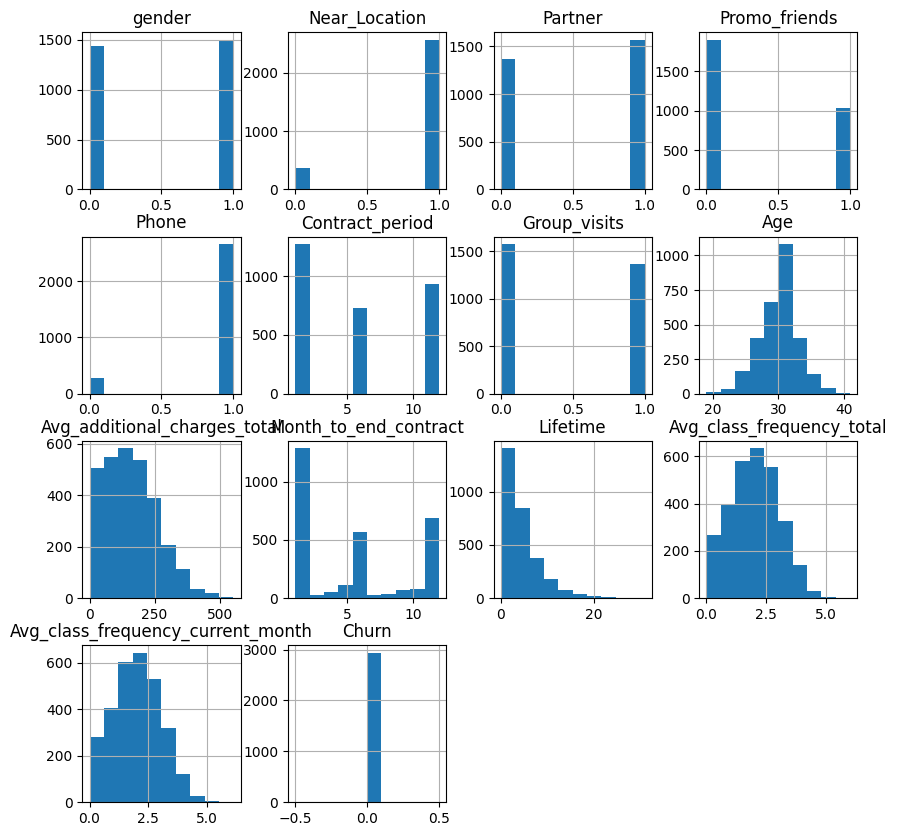

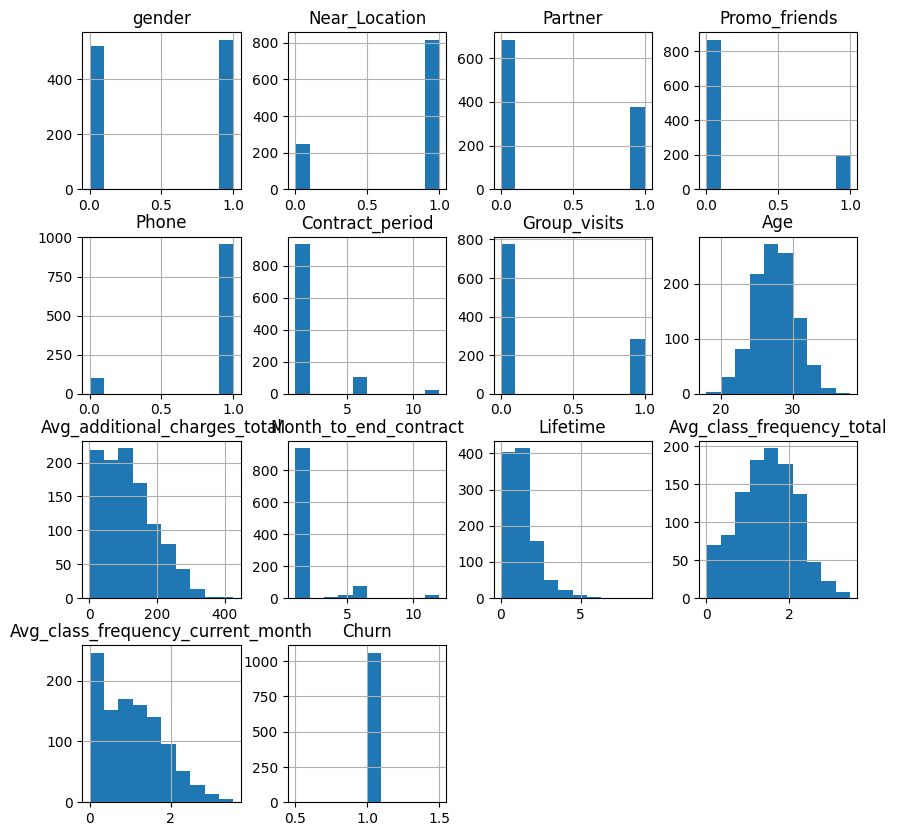

In [7]:
# Histogramas churn 0 y 1
gym.groupby('Churn').hist(figsize=(10,10))

Con solo ver los histogramas llama la atención que los usuarios que no cancelaron en el mes, tienen una mayor proporción de contratos largos.

Es decir que los usuarios que se quedaron pagaron por contratos mas largos (Month_to_end_contract y Contract_period) y aunque también hay algunos usuarios que pagaron contratos largos y no regresaron , fueron muy pocos tanto en los 6 meses como en el año entero. 

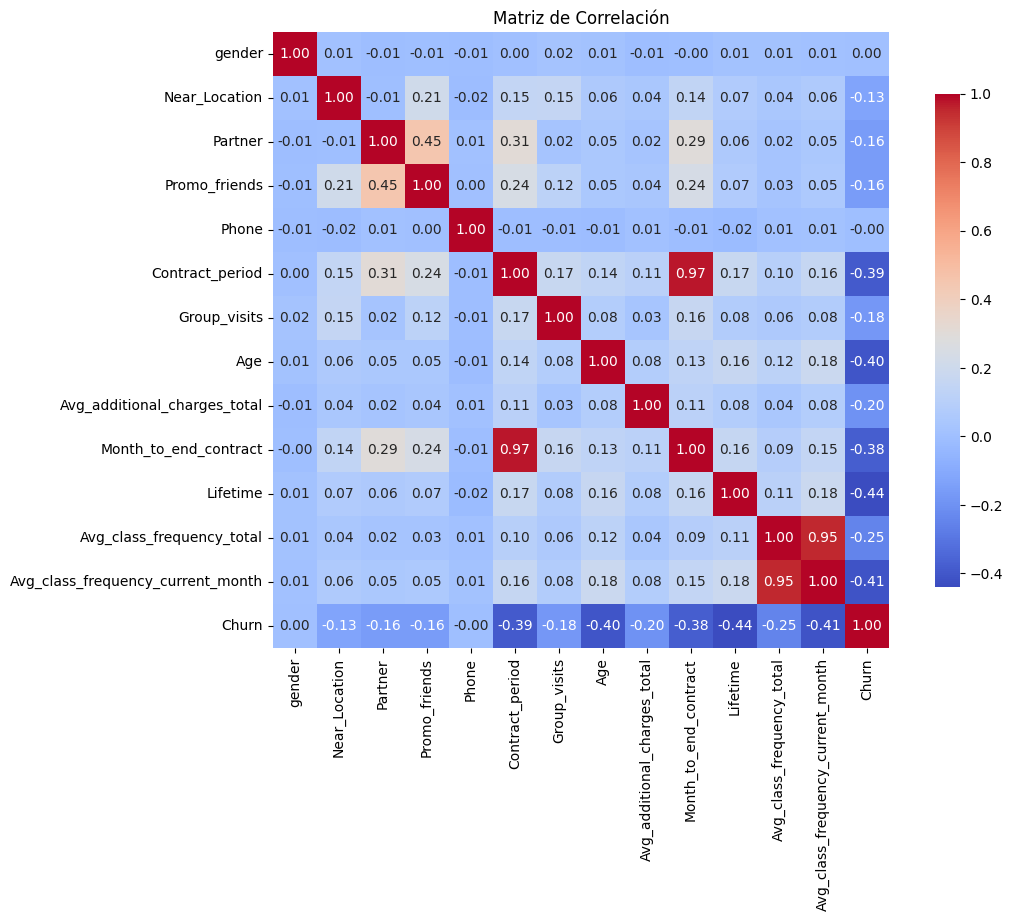

In [8]:
# Matriz de correlación
corr = gym.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

El mapa de calor nos ayuda a ver con mayor claridad la relación de Month to end contract con Contract period ya mencionadas en el punto anterior de los histogramas.

También salta a la vista la fuerte correlación  entre Avg_class_frecuency_total y Avg_class_frecuency_current_month.

Otro dato a resaltar es que en mi opinión la característica de Phone debería ser dejada de lado dada la nula correlación que tiene con el resto de características, ya que es probable que se aun campo obligatorio en el formulario de inscripción.

# Paso 2 Construir un modelo para predecir la cancelación de usuarios

## 2.1 Dividir datos en las caracterírticas y etiquetas y determinar  el data split para el entrenamiento y validación.

In [9]:
# Divide el conjunto de datos en características (X) y etiquetas (y).
X = gym.drop('Churn', axis=1)
y = gym['Churn']
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Scalar los datos.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)



## 2.2  Entrenar modelo de regresión logística y evaluar su exactitud.

In [10]:
# Entrena un modelo de regresión logística.
logistic_model = LogisticRegression()
logistic_model.fit(X_train_st, y_train)
# Realiza predicciones y evalúa el modelo.
y_pred= logistic_model.predict(X_test_st)
# Calcula las métricas de evaluación.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Regresión Logística: \n Exactitud: {accuracy:.2f} \n Precisión: {precision:.2f} \n Recall: {recall:.2f}")

Regresión Logística: 
 Exactitud: 0.92 
 Precisión: 0.85 
 Recall: 0.83


## 2.3 Entrenar modelo de bosque aleatorio y evaluar su exactitud.

In [11]:
# Entrena un modelo de Random Forest.
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)
# Realiza predicciones y evalúa el modelo.
y_pred_rf = rf_model.predict(X_test_st)
# Calcula las métricas de evaluación.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest : \n Exactitud: {accuracy_rf:.2f} \n Precisión: {precision_rf:.2f} \n Recall: {recall_rf:.2f}")

Random Forest : 
 Exactitud: 0.92 
 Precisión: 0.84 
 Recall: 0.81


Parece ser que el modelo de regresión logística es mejor, ya que, su precision es mejor por lo cual , tiene una mejor predicción positiva.

Lo mismo sucede con un mejor marcador de Recall, ya que al ser mas alto en el modelo de regresión logística, el modelo es mas sensible a encontrar todas las instancias positivas.

# Paso 3 Crear clústeres de usuarios/as.

## 3.1  Crear clusters y Dendograma.

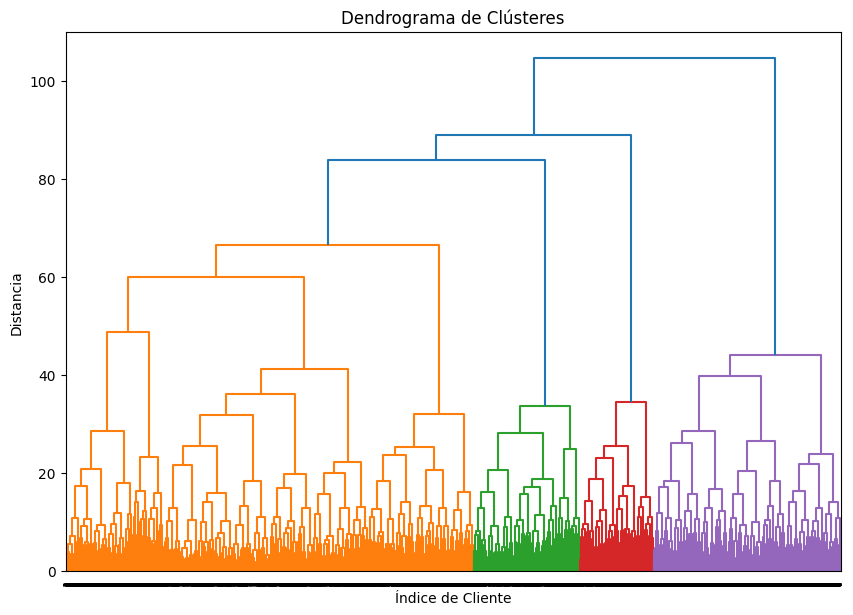

In [12]:
# Crear clusteres de clientes.
from sklearn.cluster import KMeans
# Estandardizar los datos.
X_st = scaler.fit_transform(X)
# Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_st, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=gym['Churn'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clústeres')
plt.xlabel('Índice de Cliente')
plt.ylabel('Distancia')
plt.show()

## 3.2 Entrenar modelo de clustering con el algortimo K-means.

In [17]:

n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_st)
# Añade la etiqueta del clúster al DataFrame original.
gym['Cluster'] = kmeans.labels_

In [18]:
# Mira los valores medios de característica para los clústeres.
cluster_means = gym.groupby('Cluster').mean()
display(cluster_means)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.486819,1.000000,0.243409,0.007030,0.899824,1.978910,0.326889,28.239016,130.877033,1.896309,2.477153,1.318003,1.083831,0.513181
1,0.592493,0.970509,0.288204,0.123324,0.898123,2.898123,0.482574,30.339142,164.193829,2.654155,5.219839,2.937411,2.944131,0.054960
2,0.499469,0.943677,0.740701,0.489904,0.900106,11.866100,0.551541,29.905420,165.146492,10.852285,4.737513,1.989423,1.980764,0.022317
3,0.483360,1.000000,0.798732,1.000000,0.911252,3.079239,0.445325,29.052298,139.858265,2.873217,3.510301,1.665722,1.547717,0.269414
4,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368


## 3.3 Traza distribuciones de características para los clústeres.

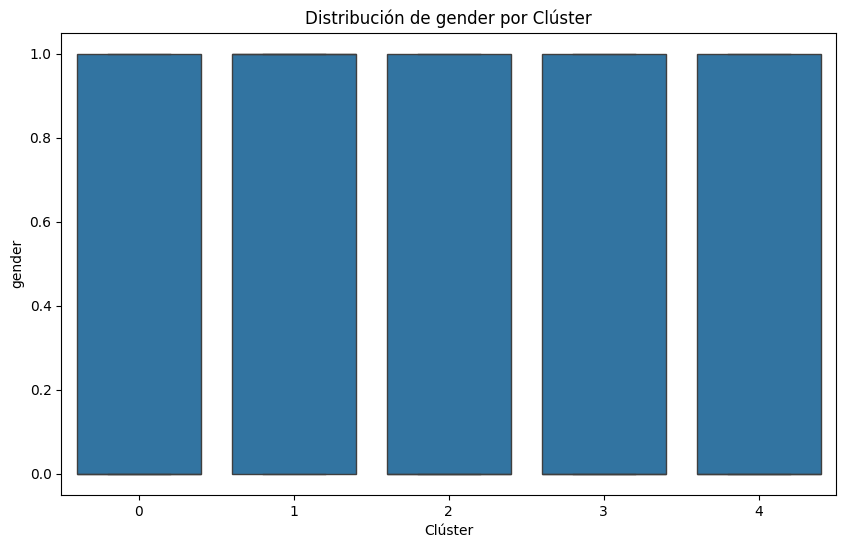

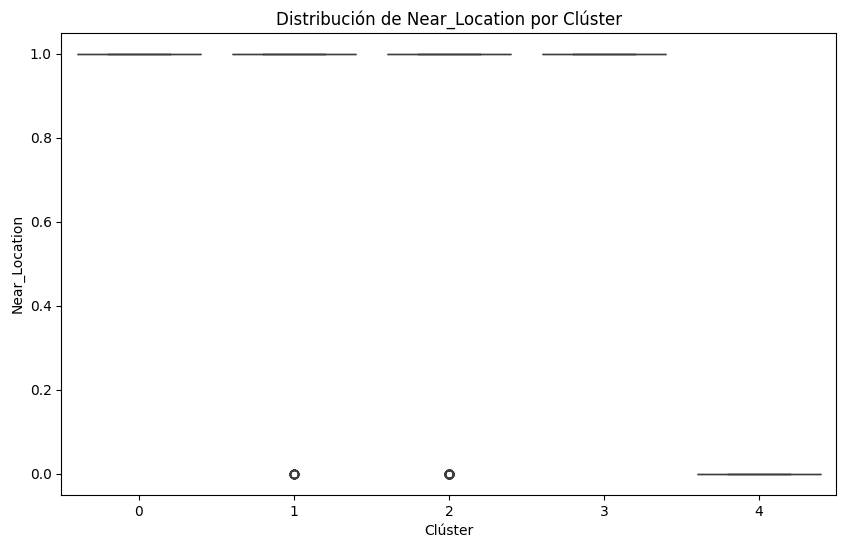

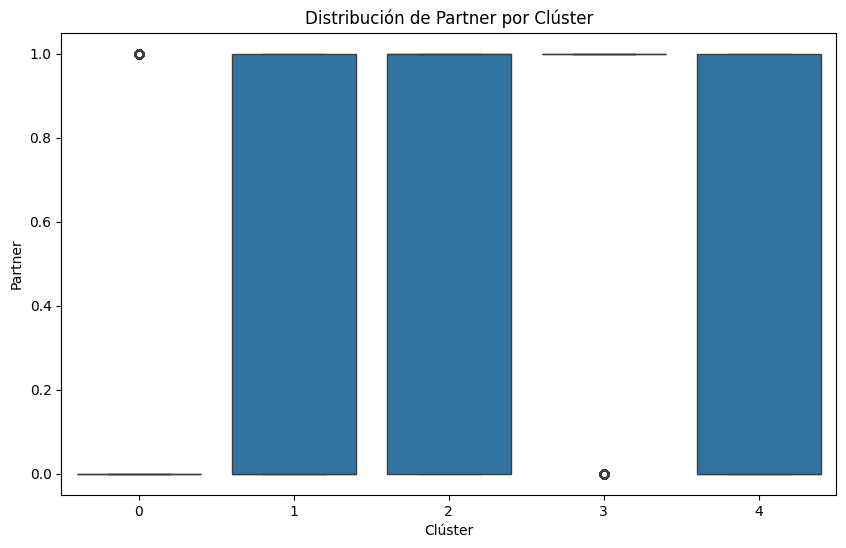

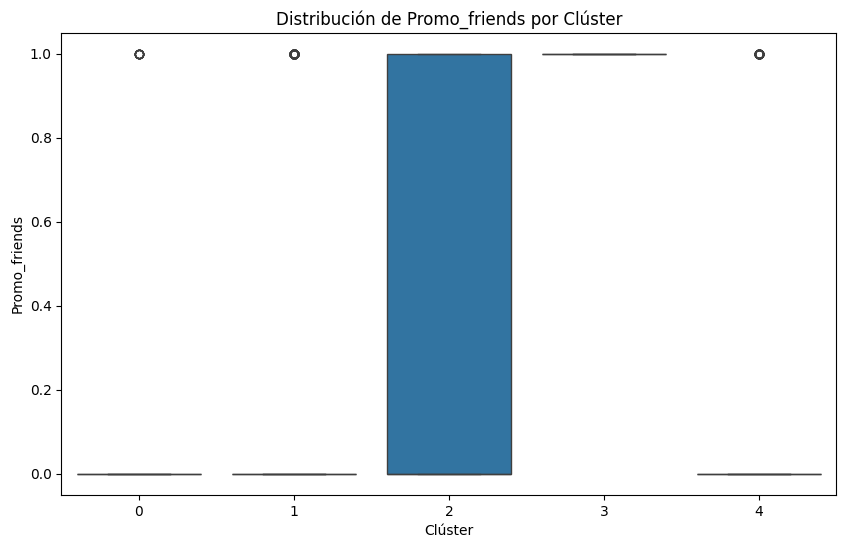

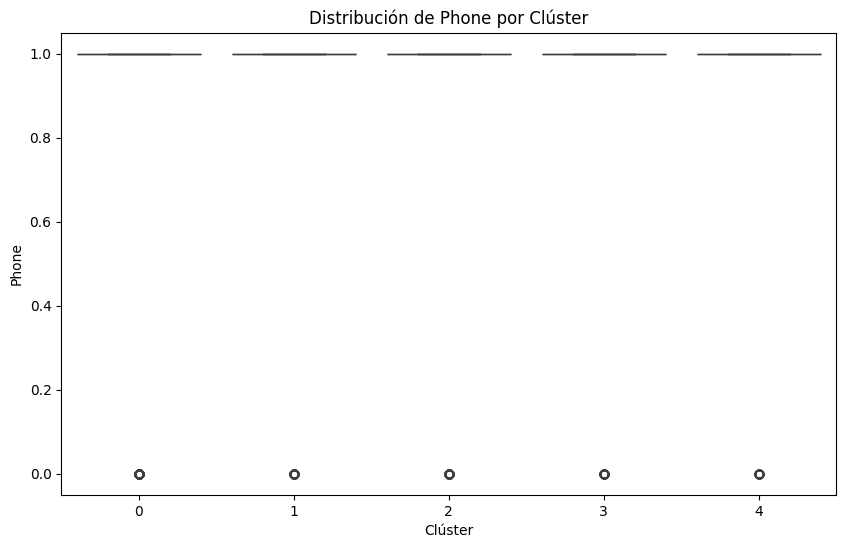

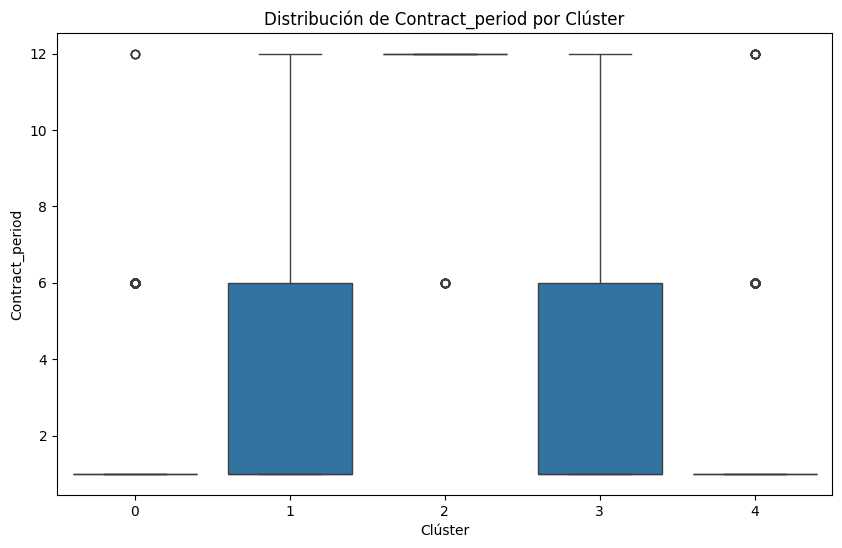

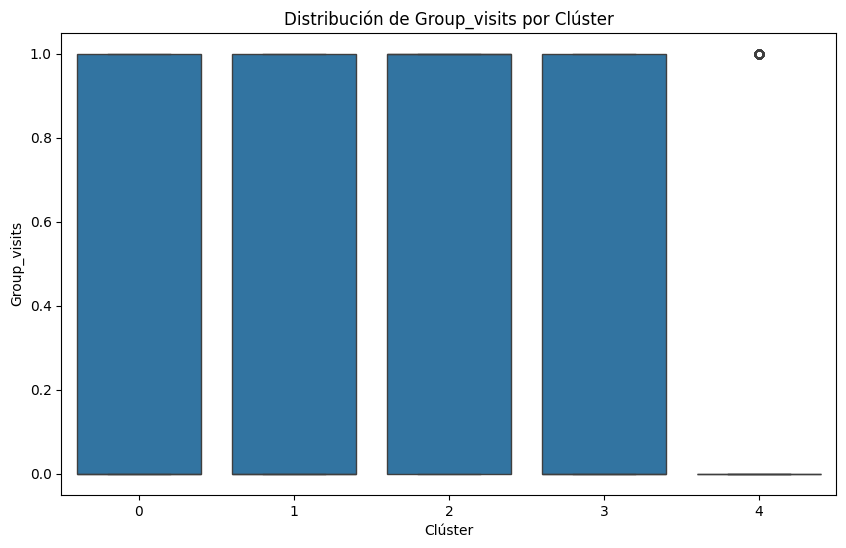

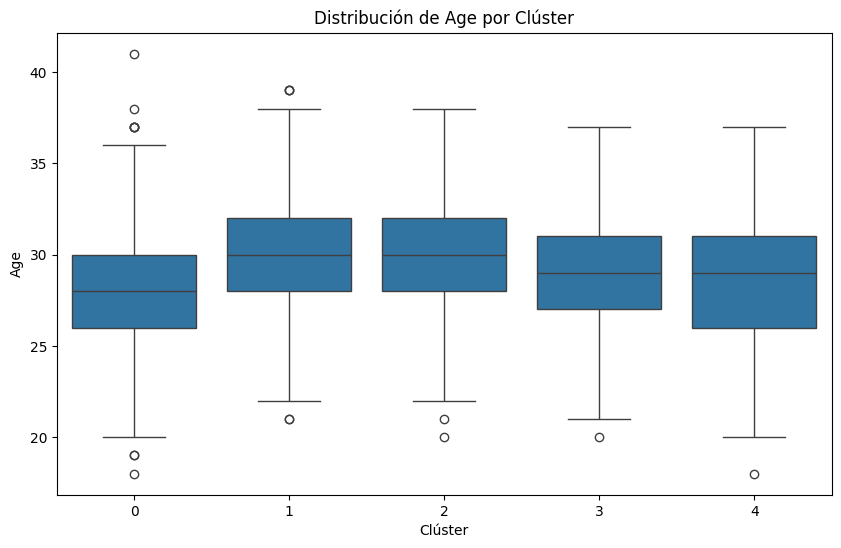

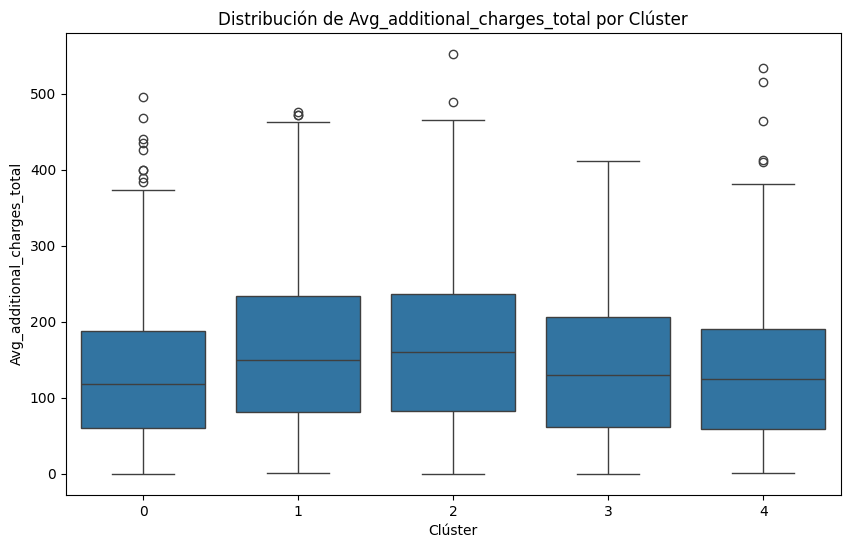

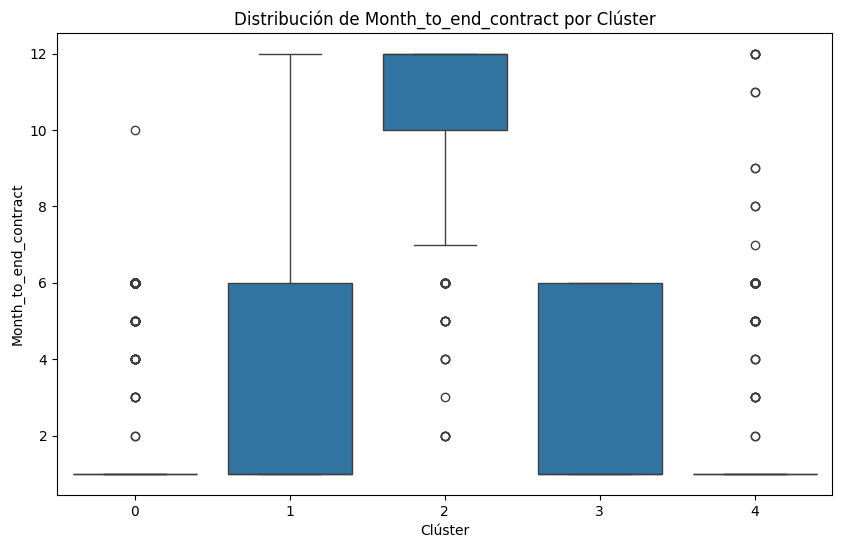

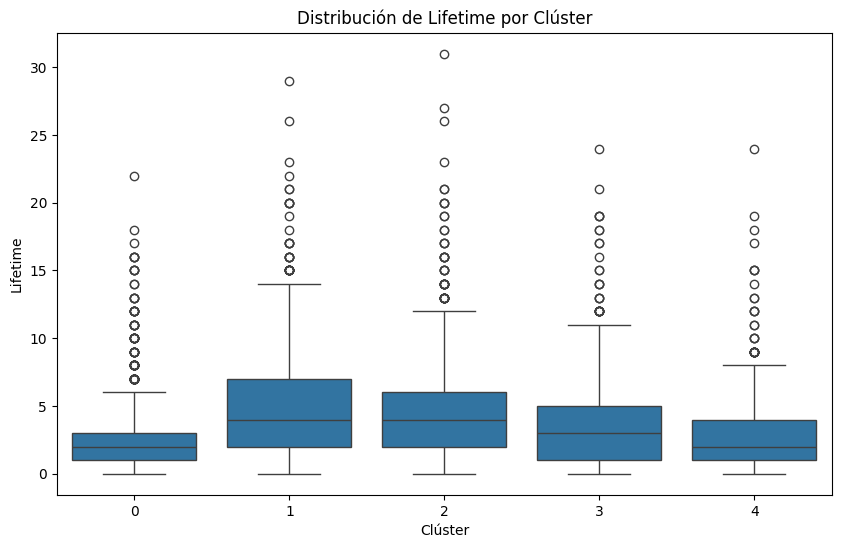

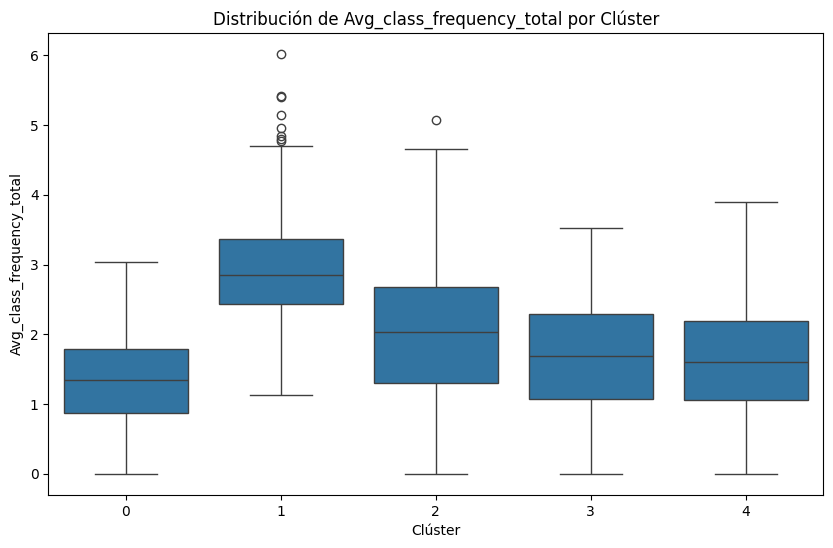

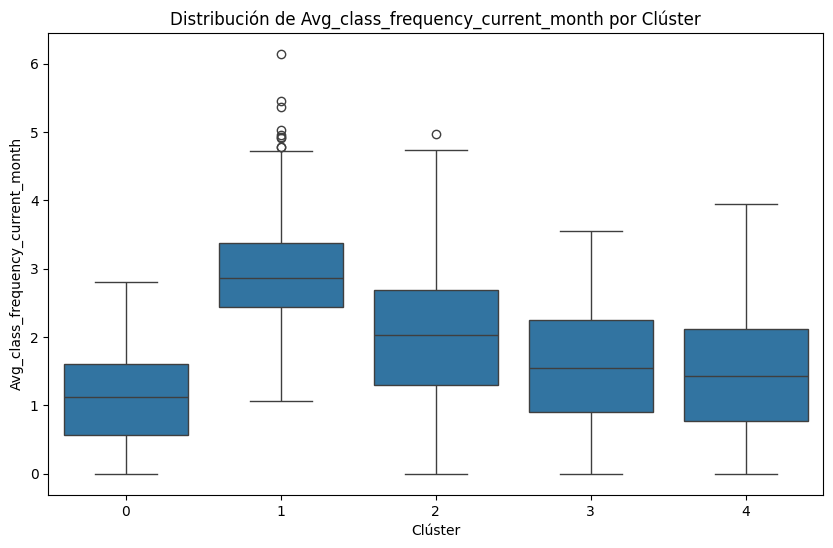

In [19]:
# Gráficos de distribuciones de características para los clústeres
for col in gym.drop(['Churn', 'Cluster'], axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=gym)
    plt.title(f'Distribución de {col} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(col)
    plt.show()

Solo de ver las medias de las caracteristicas en cada cluster es posible apreciar que las caratecristicas con las mayores diferencias en cuanto a medias son las de Month_to_end_contract y Contract_period, curioso que dese los histogramas ya se podia apreciar un poco este detalle.

Y no es hasta que vemos los graficos, que,  tambien se hace aparente la diferencia en medias de la caracterisitca Group visits del cluster 2 

## 3.4 Calcula la tasa de cancelación para cada clúster.

Tasa de cancelación por clúster:
Cluster
0    0.513181
1    0.054960
2    0.022317
3    0.269414
4    0.450368
Name: Churn, dtype: float64


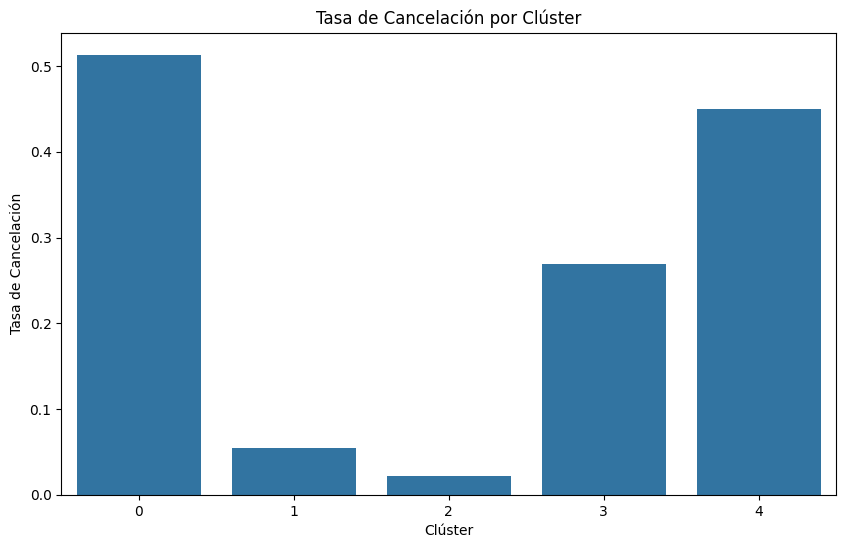

In [20]:
churn_rate = gym.groupby('Cluster')['Churn'].mean()
print("Tasa de cancelación por clúster:")
print(churn_rate)
# Traza la tasa de cancelación por clúster.
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Tasa de Cancelación por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')
plt.show()

Parece ser que los grupos mas propensos a irse son los de los clusters 0 y 4 .

Y los grupos mas fieles a pertenecer son los clusters 1 y 2 

Que tienen en comun:

Los custers 0 y 4 tienen periodos de contratación bajos y también cabe recalcar que el clúster 2 no realiza sesiones grupales, y el clúster 3 tiene un promedio menor en asistencias a clases 

Los clusters 1 y 2 tienen en común que sus contratos superan los 3 meses, así como el clúster 4 en particular tiene una asistencia promedio superior al resto de los grupos llegando a asitir hasta 3  dias a la semana o mas .

# Paso 4. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes.

Al parecer aquellas personas que tienen mas actividades grupales, asisten con mayor frecuencia y contratan periodos superiores a los 3 meses tienden a quedarse mas en el gimnasio. por lo que mis recomendaciones son las siguientes:

1. Identificar y enfocar los esfuerzos en clientes de alto riesgo.  Los clústeres con una tasa de cancelación significativamente más alta deben ser prioritarios para las estrategias de retención.

2. Se debería incentivarlos a contratar 2 meses extra de gimnasio  a auquellos que solo contratan 1 mes con algún tipo de descuento para motivarlos a quedarse al menos 3 meses, ya que parece ser un tiempo crucial la permanecía por mas de 3 meses para mejorar la tasa de retención

3. En particular a los usuarios pertenecientes al grupo 4, motivarlos a asistir a alguna clase o actividad grupal.

4. Para los usuarios pertenecientes al grupo 3 y 4,pero en especial a los del grupo 4 ,motivarlos a asistir en promedio 3 días a la semana, o mas , ya que su bajo promedio de asistencia no es suficiente para ver cambios notorios en sus físicos y /o condición en solo un mes, estas personas en promedio solo asisten 4 veces durante todo el mes.
